<a href="https://colab.research.google.com/github/dufourpascal/stepupai/blob/master/tutorials/data_augmentation/custom_data_augmentation_keras_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Custom Data Augmentation Function in Keras
Follow along on the blog: https://stepup.ai/custom-data-augmentation-keras.

In this tutorial we are going to implement our own preprocessing function for data augmentation in Keras. In particular, we will add a method that slightly changes the colors in an image by scaling the RGB channels independently


Let's start by importing everything we need and downloading a sample image.

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import requests
import random

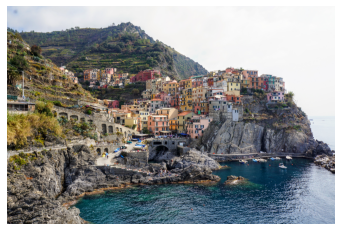

In [2]:
url = 'https://github.com/dufourpascal/stepupai/raw/master/tutorials/data_augmentation/image_town.jpg'
r = requests.get(url, allow_redirects=True)
open('image.jpg', 'wb').write(r.content)

image = load_img('image.jpg')
image = img_to_array(image).astype(int)
data = np.expand_dims(image, 0)
plt.axis('off')
plt.imshow(data[0])

Next we define a helper function to plot the augmented images.

In [3]:
def plot_augmentation(datagen, data, n_rows=1, n_cols=5):
  n_images = n_rows * n_cols
  gen_flow = datagen.flow(data)

  aspect_ratio = data.shape[1] / data.shape[2]
  base_size = 2
  fig_size = (n_cols*base_size/aspect_ratio, n_rows*base_size)
  fig = plt.figure(figsize=fig_size)

  for image_index in range(n_images):
    image = next(gen_flow)
    plt.subplot(n_rows, n_cols, image_index+1)
    plt.axis('off')
    plt.imshow(image[0], vmin=0, vmax=255)
  fig.tight_layout(pad=0.0)

Now we're ready to implement our own preprocessing function. Complete the code below by following on the blog post.

In [4]:
class CustomDataGenerator(ImageDataGenerator):
  def __init__(self,
               red_range=None,
               green_range=None,
               blue_range=None,
               **kwargs):
    '''
    Custom image data generator.
    Behaves like ImageDataGenerator, but allows color augmentation.
    '''
    super().__init__(
        preprocessing_function=self.augment_color,
        **kwargs)

    self.red_range = red_range
    self.green_range = green_range
    self.blue_range = blue_range

  def augment_color(self, image):
    '''Takes an input image and returns a modified version of it'''
    channel_ranges = (self.red_range, self.green_range, self.blue_range)
    for channel, channel_range in enumerate(channel_ranges):
      if not channel_range:
        continue  # no range set, so don't change that channel
      scale = random.uniform(channel_range[0], channel_range[1])
      image[:, :, channel] = image[:, :, channel] * scale

    image = np.clip(image, 0, 255)
    return image

Execute the code blow to see the results of the color data augmentation.
Note that you can set additional augmentation parameters such as `brightness_range` in combination to our own color ranges!

Also experiment with the ranges for each color channel to get a feeling for good values.

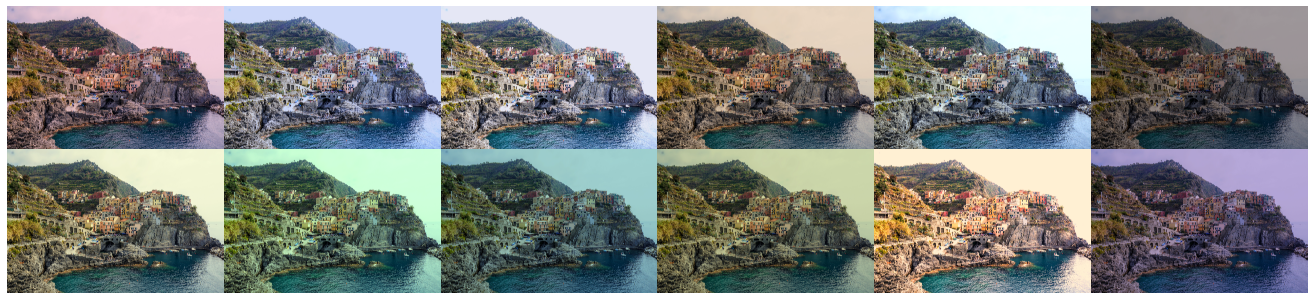

In [5]:
datagen = CustomDataGenerator(red_range=(0.8, 1.2),
                              green_range=(0.8, 1.2),
                              blue_range=(0.8, 1.2),
                              brightness_range=(0.5, 1.5),
                              dtype=int)
datagen.fit(data)
plot_augmentation(datagen, data, n_rows=2, n_cols=6)